In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time 
#helper libraries

In [2]:
df = pd.read_csv('data2/combined_input.csv',delimiter=',')

In [3]:
df

,Unnamed: 0,LHipAngleZ,LKneeAngleZ,LAnkleAngleZ,RHipAngleZ,RKneeAngleZ,RAnkleAngleZ
0,0,33.6171,4.41165,-1.60145,34.6059,7.84149,-0.888355
1,1,33.0968,4.97060,-2.28572,34.2480,8.52145,-1.722580
2,2,32.4813,4.89321,-3.70587,33.7505,8.37467,-3.487650
3,3,32.0230,5.08788,-4.65142,33.3442,8.29902,-4.789310
4,4,31.8928,6.13329,-4.59726,33.2273,9.06915,-4.886310
...,...,...,...,...,...,...,...
28578,96,30.0628,6.61522,1.76042,30.3217,6.07556,2.040620
28579,97,30.1267,5.11645,1.77006,30.2766,5.53024,2.111000
28580,98,30.2571,4.37271,1.94703,30.2874,5.60130,2.213290
28581,99,30.4227,4.33840,2.17423,30.3184,6.18280,2.127100


In [4]:
col_to_select = ['RHipAngleZ','RAnkleAngleZ','RKneeAngleZ','LHipAngleZ','LAnkleAngleZ','LKneeAngleZ']
df = df[col_to_select]

In [5]:
df

,RHipAngleZ,RAnkleAngleZ,RKneeAngleZ,LHipAngleZ,LAnkleAngleZ,LKneeAngleZ
0,34.6059,-0.888355,7.84149,33.6171,-1.60145,4.41165
1,34.2480,-1.722580,8.52145,33.0968,-2.28572,4.97060
2,33.7505,-3.487650,8.37467,32.4813,-3.70587,4.89321
3,33.3442,-4.789310,8.29902,32.0230,-4.65142,5.08788
4,33.2273,-4.886310,9.06915,31.8928,-4.59726,6.13329
...,...,...,...,...,...,...
28578,30.3217,2.040620,6.07556,30.0628,1.76042,6.61522
28579,30.2766,2.111000,5.53024,30.1267,1.77006,5.11645
28580,30.2874,2.213290,5.60130,30.2571,1.94703,4.37271
28581,30.3184,2.127100,6.18280,30.4227,2.17423,4.33840


In [6]:
def split_sequence(sequence, look_back, forecast_horizon):
 X, y = list(), list()
 for i in range(len(sequence)):
        if( i!= 0 and (i)%100 == 0):
            continue
        else:
            lag_end = i + look_back
            forecast_end = lag_end + forecast_horizon
            if forecast_end > len(sequence):
                break
            seq_x, seq_y = sequence[i:lag_end], sequence[lag_end:forecast_end]
            X.append(seq_x)
            y.append(seq_y)    
 return np.array(X), np.array(y)

In [7]:
trainX,trainY = split_sequence(df,1,1)



In [8]:
LOOK_BACK = 1
FORECAST_RANGE = 1
n_features = 6

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(LOOK_BACK, n_features)))
model.add(RepeatVector(FORECAST_RANGE))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42800     
                                                                 
 repeat_vector (RepeatVector  (None, 1, 100)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 1, 100)            80400     
                                                                 
 time_distributed (TimeDistr  (None, 1, 6)             606       
 ibuted)                                                         
                                                                 
Total params: 123,806
Trainable params: 123,806
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [11]:
model.fit(trainX, trainY, epochs=20)

Epoch 1/20
885/885 [==============================] - 10s 6ms/step - loss: 86.6580 - root_mean_squared_error: 9.3090
Epoch 2/20
885/885 [==============================] - 5s 6ms/step - loss: 2.0953 - root_mean_squared_error: 1.4475
Epoch 3/20
885/885 [==============================] - 5s 6ms/step - loss: 1.3651 - root_mean_squared_error: 1.1684
Epoch 4/20
885/885 [==============================] - 5s 6ms/step - loss: 1.0265 - root_mean_squared_error: 1.0131
Epoch 5/20
885/885 [==============================] - 5s 6ms/step - loss: 0.8706 - root_mean_squared_error: 0.9331
Epoch 6/20
885/885 [==============================] - 6s 6ms/step - loss: 0.7796 - root_mean_squared_error: 0.8830
Epoch 7/20
885/885 [==============================] - 6s 6ms/step - loss: 0.7199 - root_mean_squared_error: 0.8484
Epoch 8/20
885/885 [==============================] - 5s 6ms/step - loss: 0.6790 - root_mean_squared_error: 0.8240
Epoch 9/20
885/885 [==============================] - 5s 6ms/step - loss: 0.65

In [12]:
df1 = pd.read_csv('data2/combined_output.csv',delimiter=',')
col_to_select = ['RHipAngleZ','RAnkleAngleZ','RKneeAngleZ','LHipAngleZ','LAnkleAngleZ','LKneeAngleZ']
df1 = df1[col_to_select]
df1

,RHipAngleZ,RAnkleAngleZ,RKneeAngleZ,LHipAngleZ,LAnkleAngleZ,LKneeAngleZ
0,37.4533,10.827400,25.334500,37.9532,11.08570,24.481600
1,36.8720,10.933400,25.433900,37.4015,10.98670,24.724400
2,36.4466,11.236400,25.975100,36.9876,11.05430,25.323700
3,36.3045,11.621700,26.895800,36.8096,11.29290,26.226100
4,36.3437,12.043200,27.948200,36.7209,11.57550,27.174000
...,...,...,...,...,...,...
4540,28.7512,0.031194,1.356380,27.8472,2.17042,-0.688298
4541,28.1981,0.171416,-0.228217,27.5101,2.22111,-1.909890
4542,27.7521,0.424163,-1.051860,27.2081,2.39437,-2.503750
4543,27.4051,0.703954,-1.151260,26.9458,2.59940,-2.494590


In [13]:
testX,testY = split_sequence(df,1,1)
testX.shape,testY.shape

((28297, 1, 6), (28297, 1, 6))

In [14]:
y_predicted = model.predict(testX)


In [15]:
predict_result = []
for li in y_predicted[:,:,5:6]:
    predict_result.append(li[0][0])



In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(GRU(100, activation='relu', input_shape=(LOOK_BACK, n_features)))
model2.add(RepeatVector(FORECAST_RANGE))
model2.add(GRU(100, activation='relu', return_sequences=True))
model2.add(TimeDistributed(Dense(n_features)))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               32400     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 100)           0         
 or)                                                             
                                                                 
 gru_1 (GRU)                 (None, 1, 100)            60600     
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 6)             606       
 tributed)                                                       
                                                                 
Total params: 93,606
Trainable params: 93,606
Non-trainable params: 0
_________________________________________________________________


In [17]:
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model2.fit(trainX, trainY, epochs=20)

Epoch 1/20
885/885 [==============================] - 10s 6ms/step - loss: 86.9524 - root_mean_squared_error: 9.3248
Epoch 2/20
885/885 [==============================] - 5s 6ms/step - loss: 1.7870 - root_mean_squared_error: 1.3368
Epoch 3/20
885/885 [==============================] - 5s 6ms/step - loss: 1.1763 - root_mean_squared_error: 1.0846
Epoch 4/20
885/885 [==============================] - 5s 6ms/step - loss: 0.9491 - root_mean_squared_error: 0.9742
Epoch 5/20
885/885 [==============================] - 5s 6ms/step - loss: 0.8370 - root_mean_squared_error: 0.9149
Epoch 6/20
885/885 [==============================] - 5s 6ms/step - loss: 0.7614 - root_mean_squared_error: 0.8726
Epoch 7/20
885/885 [==============================] - 5s 6ms/step - loss: 0.7103 - root_mean_squared_error: 0.8428
Epoch 8/20
885/885 [==============================] - 5s 6ms/step - loss: 0.6762 - root_mean_squared_error: 0.8223
Epoch 9/20
885/885 [==============================] - 5s 6ms/step - loss: 0.65

In [18]:
y_predicted_gru = model2.predict(testX)


In [22]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [19]:
predict_result_gru = []
for li in y_predicted_gru[:,:,5:6]:
    predict_result_gru.append(li[0][0])


In [23]:
def plot_models(y_predicted,y_predicted_gru,testY,col,r,titl):
    
    test_result = []
    dataframe = {}
    
    for li in testY[:,:,col:col+1]:
        test_result.append(li[0][0])
    predict_result_gru = []
    for li in y_predicted_gru[:,:,col:col+1]:
        predict_result_gru.append(li[0][0])
    predict_result = []
    for li in y_predicted[:,:,col:col+1]:
        predict_result.append(li[0][0])
    
    dataframe['original'] = test_result
    dataframe['lstm_predicted'] = predict_result
    dataframe['gru_predicted'] = predict_result_gru
    plt.plot(test_result[:r] , color='red',label='original')    
    plt.plot(predict_result[:r],color='green',label='LSTM')
    plt.plot(predict_result_gru[:r],color='black',label='GRU')
    plt.xlabel('time')
    plt.ylabel('angle')
    plt.legend(loc="upper right")      
    plt.show()
    
    df = pd.DataFrame(dataframe)
    
    
    
    print("correlation and root mean square error between original values and values predicted by LSTM is :",df['original'].corr(df['lstm_predicted']),"and ",rmse(df['original'],df['lstm_predicted']),"respectively.")
    print("correlation and root mean square error between original values and values predicted by GRU is :",df['original'].corr(df['gru_predicted']),"and ",rmse(df['original'],df['gru_predicted']),"respectively.")
    return df


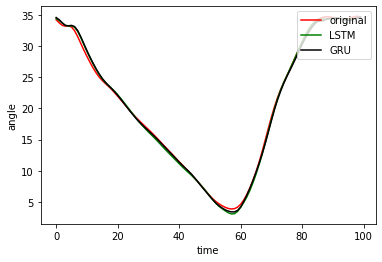

correlation and root mean square error between original values and values predicted by LSTM is : 0.9992622751263499 and  0.6333506079775829 respectively.
correlation and root mean square error between original values and values predicted by GRU is : 0.9992917125752996 and  0.614121771896753 respectively.


,original,lstm_predicted,gru_predicted
0,34.2480,34.436588,34.605473
1,33.7505,34.148705,34.246902
2,33.3442,33.732147,33.724289
3,33.2273,33.351295,33.331745
4,33.2652,33.236298,33.277214
...,...,...,...
28292,30.3217,30.250244,30.308926
28293,30.2766,30.109116,30.237450
28294,30.2874,30.051365,30.201351
28295,30.3184,30.071892,30.212730


In [24]:
plot_models(y_predicted,y_predicted_gru,testY,0,100,'Right Hip')

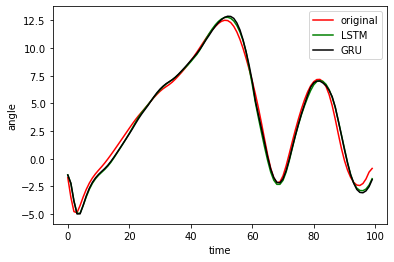

correlation and root mean square error between original values and values predicted by LSTM is : 0.9965525353809246 and  0.603876713608003 respectively.
correlation and root mean square error between original values and values predicted by GRU is : 0.9965705703920155 and  0.601515753148149 respectively.


,original,lstm_predicted,gru_predicted
0,-1.72258,-1.468337,-1.476206
1,-3.48765,-2.227729,-2.223979
2,-4.78931,-3.824589,-3.836471
3,-4.88631,-4.945745,-4.997021
4,-4.23580,-4.941353,-4.988981
...,...,...,...
28292,2.04062,1.704778,1.778129
28293,2.11100,1.516801,1.546700
28294,2.21329,1.599340,1.541292
28295,2.12710,1.719806,1.634288


In [25]:
plot_models(y_predicted,y_predicted_gru,testY,1,100,'Right Ankle')

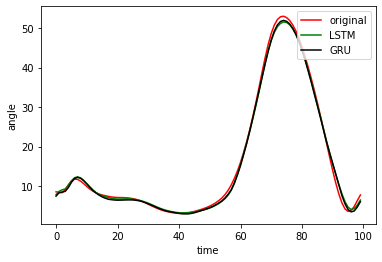

correlation and root mean square error between original values and values predicted by LSTM is : 0.9988399468058551 and  0.9790895364106417 respectively.
correlation and root mean square error between original values and values predicted by GRU is : 0.9987999078715404 and  0.9873517983718827 respectively.


,original,lstm_predicted,gru_predicted
0,8.52145,7.790440,7.438510
1,8.37467,8.657890,8.288870
2,8.29902,9.024777,8.471240
3,9.06915,9.256905,8.645531
4,10.30130,10.121507,9.589415
...,...,...,...
28292,6.07556,6.844059,6.404974
28293,5.53024,5.657991,5.167935
28294,5.60130,5.110109,4.649508
28295,6.18280,5.070404,4.635071


In [26]:
plot_models(y_predicted,y_predicted_gru,testY,2,100,'Right Knee')

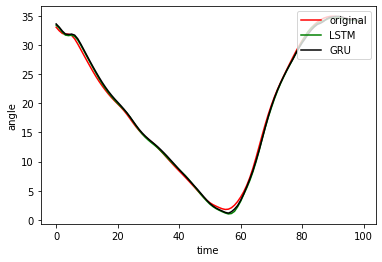

correlation and root mean square error between original values and values predicted by LSTM is : 0.9992421978454594 and  0.6277135733224553 respectively.
correlation and root mean square error between original values and values predicted by GRU is : 0.9992789947675079 and  0.6192617717374642 respectively.


,original,lstm_predicted,gru_predicted
0,33.0968,33.450523,33.651981
1,32.4813,32.933491,33.106606
2,32.0230,32.258526,32.439518
3,31.8928,31.738953,31.932386
4,31.9057,31.650595,31.823879
...,...,...,...
28292,30.0628,29.726362,29.906612
28293,30.1267,29.726786,29.939428
28294,30.2571,29.788671,29.977871
28295,30.4227,29.904051,30.088551


In [27]:
plot_models(y_predicted,y_predicted_gru,testY,3,100,'Left Hip')

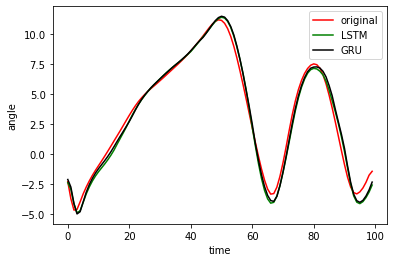

correlation and root mean square error between original values and values predicted by LSTM is : 0.996467022589961 and  0.5903879697782166 respectively.
correlation and root mean square error between original values and values predicted by GRU is : 0.9964184014875977 and  0.5895239588869877 respectively.


,original,lstm_predicted,gru_predicted
0,-2.28572,-2.369056,-2.108365
1,-3.70587,-2.928303,-2.739035
2,-4.65142,-4.138643,-4.095914
3,-4.59726,-4.880451,-4.970721
4,-3.97508,-4.707358,-4.790451
...,...,...,...
28292,1.76042,1.575545,1.707520
28293,1.77006,1.361366,1.388762
28294,1.94703,1.397698,1.339209
28295,2.17423,1.595209,1.489012


In [28]:
plot_models(y_predicted,y_predicted_gru,testY,4,100,'Left Ankle')

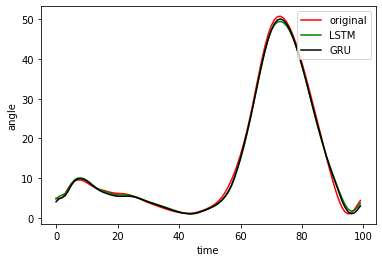

correlation and root mean square error between original values and values predicted by LSTM is : 0.99884547135 and  0.9667133575228598 respectively.
correlation and root mean square error between original values and values predicted by GRU is : 0.9987909132009524 and  0.9806930088552752 respectively.


,original,lstm_predicted,gru_predicted
0,4.97060,4.741261,4.063643
1,4.89321,5.446831,4.812181
2,5.08788,5.751813,5.126641
3,6.13329,6.161023,5.619470
4,7.53348,7.291218,6.805261
...,...,...,...
28292,6.61522,8.315189,8.000484
28293,5.11645,6.312028,5.796069
28294,4.37271,4.968657,4.329047
28295,4.33840,4.234048,3.519978


In [29]:
plot_models(y_predicted,y_predicted_gru,testY,5,100,'Left Knee')